In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [237]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 20, 6
sns.set(font_scale=1.5)

In [238]:
DF_PATH = os.getcwd() + "/csv/used_cars.csv"
df = pd.read_csv(DF_PATH, sep=";", encoding = "ISO-8859-1")
df.head()

,name,year,mileage,engine_power_kW,engine_power_hp,fuel,consumption,ecology,gearbox,price,currency,country,capacity,other,engine_size,nr_of_accidents,color_exterior,color_interior
0,Daewoo Rezzo,2003,200000 km,89 kW,121 hp,Gasoline,9 l/100 km,236 g CO2/km,Manual,"199,00",EUR,Germany,NaN,NaN,NaN,NaN,NaN,NaN
1,Volkswagen Golf,1994,222275 km,55 kW,75 hp,Gasoline,0 l/100 km,0 g CO2/km,Manual,"200,00",EUR,Germany,NaN,NaN,NaN,NaN,NaN,NaN
2,Ford Fiesta,2001,153000 km,44 kW,60 hp,Gasoline,7.3 l/100 km,171 g CO2/km,Manual,"290,00",EUR,Germany,NaN,NaN,NaN,NaN,NaN,NaN
3,Volkswagen Polo,1999,154000 km,44 kW,60 hp,Gasoline,6.3 l/100 km,151 g CO2/km,Manual,"350,00",EUR,Germany,NaN,NaN,NaN,NaN,NaN,NaN
4,Nissan Micra,1998,140000 km,40 kW,54 hp,Gasoline,6 l/100 km,152 g CO2/km,Manual,"380,00",EUR,Germany,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
df.shape

(1816, 18)

In [240]:
df.loc[df.year == "-", ["year"]] = 'unknown'
df.loc[df.year == '0', ["year"]] = 'unknown'

Text(0.5, 1.0, 'Cars sold in each country')

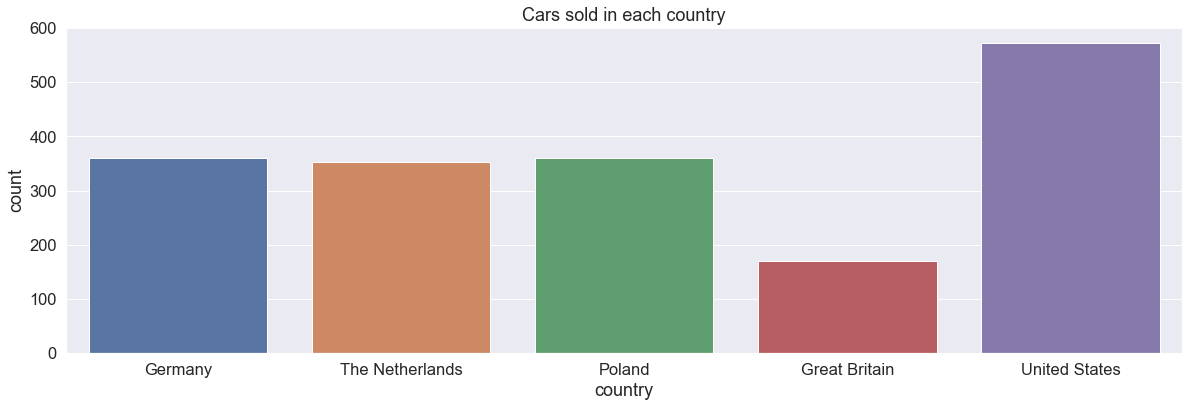

In [241]:
sns.countplot(df.country).set_title('Cars sold in each country')

Text(0.5, 1.0, 'Cars by Year')

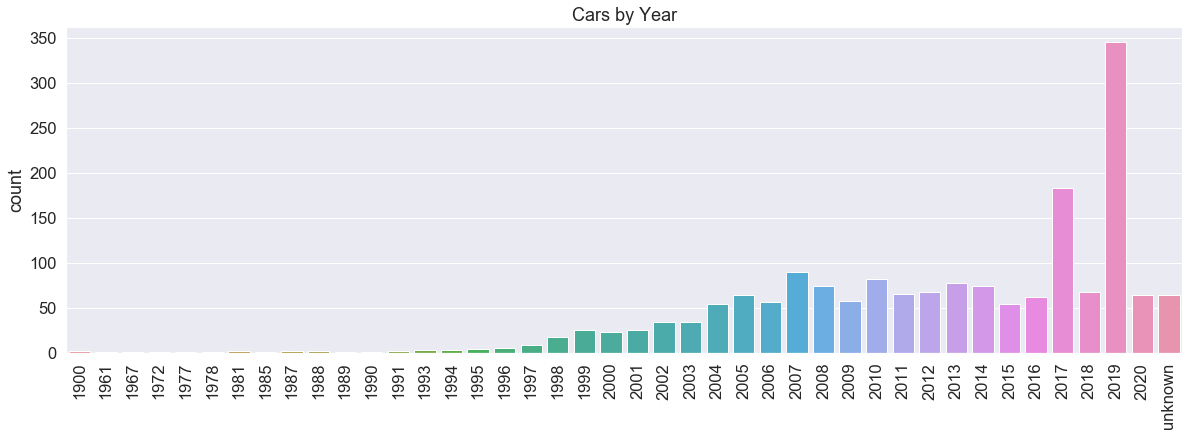

In [242]:
plt.xticks(rotation = 90)
sns.countplot(list(sorted(df.year))).set_title("Cars by Year")

Text(0.5, 1.0, 'Cars by Fuel Type')

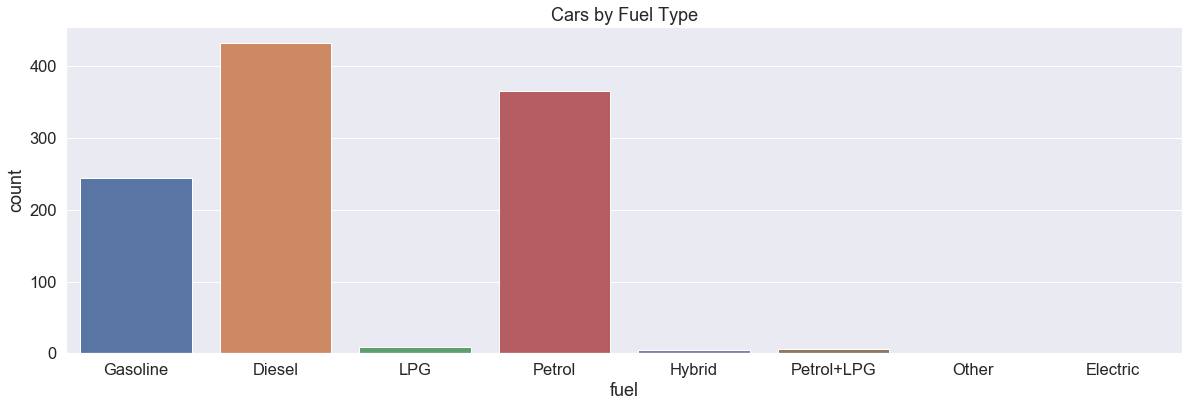

In [243]:
sns.countplot(df.fuel).set_title("Cars by Fuel Type")

Text(0.5, 1.0, 'Cars by Transmission')

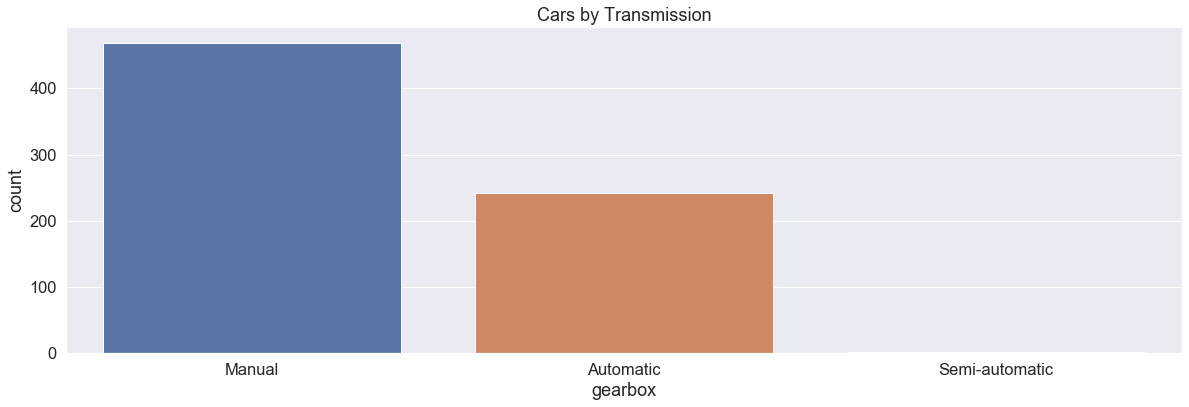

In [244]:
sns.countplot(df.gearbox).set_title("Cars by Transmission")

Text(0.5, 1.0, 'Cars by Exterior Color')

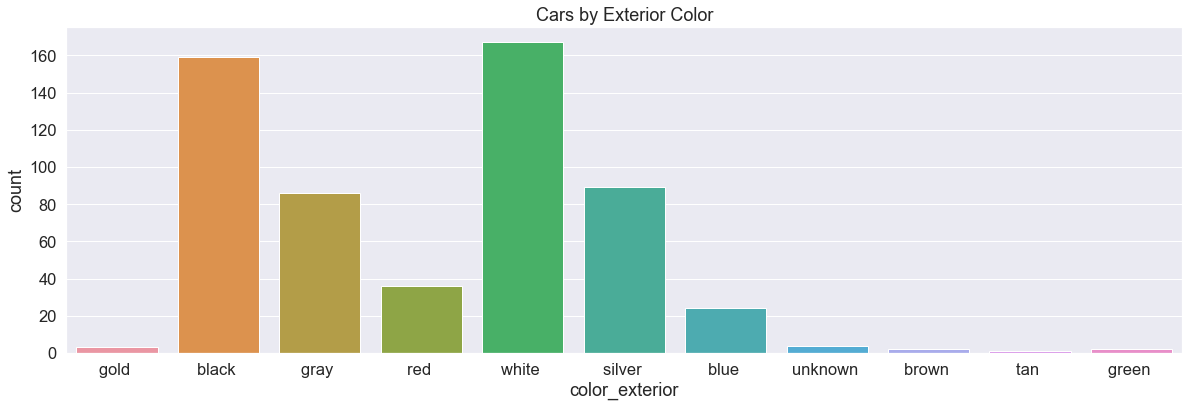

In [245]:
sns.countplot(df.color_exterior).set_title("Cars by Exterior Color")

Text(0.5, 1.0, 'Cars by Interior Color')

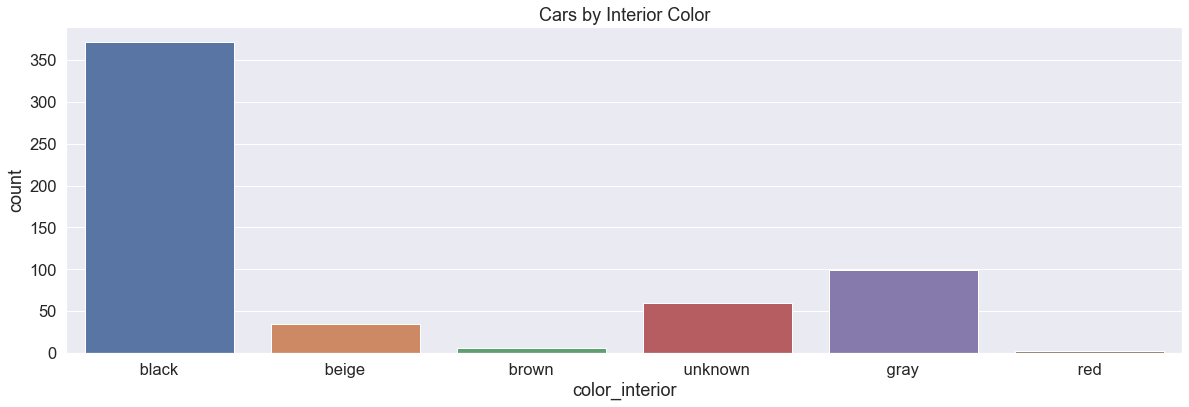

In [246]:
sns.countplot(df.color_interior).set_title("Cars by Interior Color")

Text(0.5, 1.0, 'Cars by Number of Accidents')

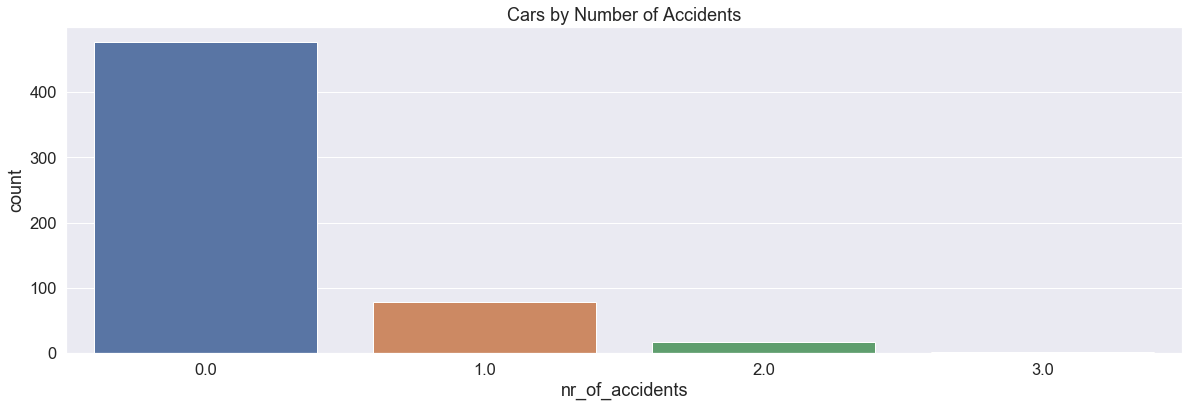

In [247]:
sns.countplot(df.nr_of_accidents).set_title('Cars by Number of Accidents')

## Convert miles to km in the "Mileage" column

In [249]:
miles_to_km = 1.609344

miles_df = df[df.mileage.str.contains("mi")].mileage.str.replace(r"[a-z]+", "")
miles_df = round(miles_df.str.replace(',', "", regex=False).astype(float) * miles_to_km, 0)

km_df = df[~df.mileage.str.contains("mi")].mileage.str.replace(r"[a-z]+", "")
km_df = km_df.str.replace(',', "", regex=False).astype(float)

contains_miles = df.mileage.str.contains("mi")
df.loc[contains_miles, ['mileage']] = miles_df

contains_miles = ~contains_miles
df.loc[contains_miles, ['mileage']] = km_df

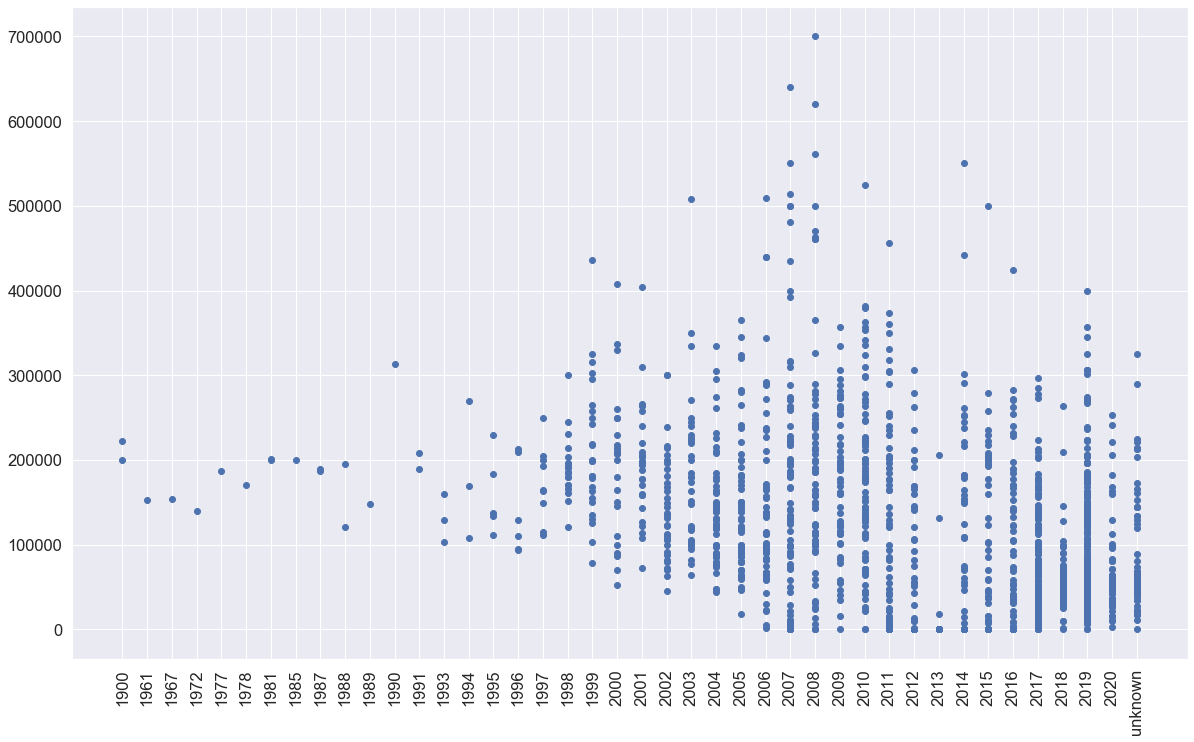

In [250]:
rcParams["figure.figsize"] = 20, 12
plt.scatter(list(sorted(df.year)), df.mileage)
plt.xticks(rotation = 90)
plt.show()

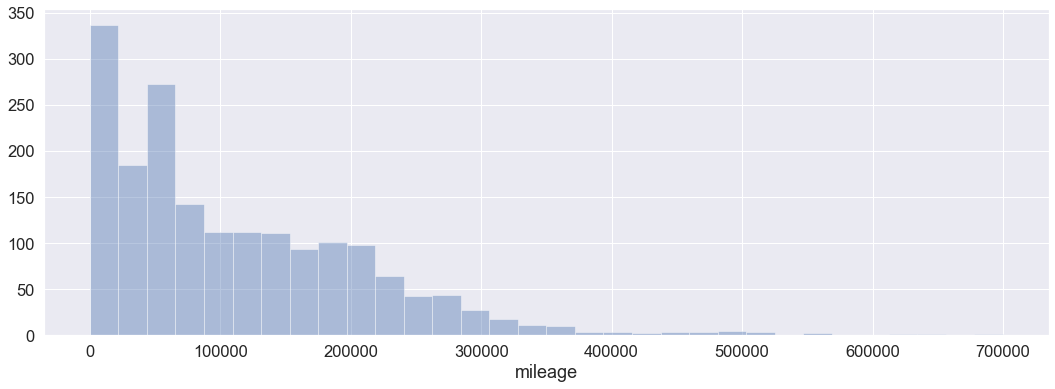

In [259]:
rcParams["figure.figsize"] = 18, 6
sns.distplot(df.mileage, kde=False)
# plt.xticks(rotation = 90)
plt.show()

In [252]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()

In [253]:
currencies = df.currency.unique()
# currencies = [c for c in currencies if c != "EUR"]
currencies

array(['EUR', 'PLN', 'GBP', 'USD'], dtype=object)

## Converting each price to Euro

In [254]:
df.price = df.price.str.replace(",", ".").astype(float)

for currency in currencies:
    price = df[df.currency == currency].price
    curr = [round(c.convert(p, currency, "EUR"), 2) for p in (list(price))]
    df.loc[df.currency == currency, "price_eur"] = curr

df = df.drop(columns=["price", "currency"])

In [274]:
marks = list(df.name.unique())
marks_clean = []
for mark in marks:
    mark = mark.lower().split(" ")
    for m in mark:
        if not m.isdigit():
            marks_clean.append(m)
            break
# marks = [m.split(" ")[0] if not m.split(" ")[0].isdigit() else m.split(" ")[1] for m in marks]
# marks = set(marks)
# marks_clean

In [275]:
from collections import Counter
counter = Counter(marks_clean)
# most_occur = counter.most_common(40)
print(counter)

Counter({'mercedes': 99, 'ford': 94, 'mercedes-benz': 83, 'volkswagen': 64, 'bmw': 60, 'toyota': 51, 'opel': 49, 'audi': 47, 'nissan': 43, 'peugeot': 35, 'renault': 33, 'chevrolet': 32, 'honda': 32, 'volvo': 30, 'hyundai': 29, 'fiat': 28, 'kia': 28, 'land': 28, 'mazda': 19, 'skoda': 18, 'jcb': 18, 'caterpillar': 18, 'jeep': 17, 'citroen': 16, 'suzuki': 13, 'vauxhall': 12, 'mitsubishi': 10, 'seat': 9, 'komatsu': 9, 'mini': 8, 'lexus': 8, 'case': 8, 'chrysler': 8, 'dodge': 8, 'porsche': 7, 'â\x8akoda': 7, 'alfa': 6, 'claas': 6, 'manitou': 6, 'bobcat': 6, 'ram': 6, 'iveco': 5, 'jaguar': 5, 'gmc': 5, 'saab': 4, 'dacia': 4, 'bentley': 4, 'infiniti': 4, 'citroã«n': 4, 'massey': 4, 'new': 4, 'hitachi': 4, 'maserati': 3, 'vw': 3, 'doosan': 3, 'man': 3, 'john': 3, 'kubota': 3, 'bomag': 3, 'aston': 3, 'subaru': 3, 'lancia': 2, 'smart': 2, 'daihatsu': 2, 'terex': 2, 'fendt': 2, 'kymco': 2, 'yamaha': 2, 'ds': 2, 'daewoo': 1, 'maybach': 1, 'triumph': 1, 'wacker': 1, 'vã¤derstad': 1, 'skuter': 1, 's